# M1 S1 2023-2024 / AI 1<sup>st</sup> EXAM
### November 21<sup>st</sup>, 2023

### Rules

Once this notebook downloaded, copied to your notebook folder and opened on your local machine :
* Modify the name of this file with your $last name$ and $first name$ (in this order).
* Fill the empty cells of the nootbook with your own python code.
* Execute andt test your notebook (no errors accepted).
* Download your notebook (in IPYNB format) to the Junia-Learning deposit (Keep the execution results and figures).
* Do not submit your work with email or private messages!

Exercices are independant.
***

# Exercise 1:

We want to predict the final projet note of the students, depending on different parameters. 
We collected (with a google form) some examples shown in this table :

|ID |Number of hours spent on the project |Hours of absence |Mean sleeping hours |Mean of previous year |Final note |
|---|---|---|---|---|---|
|Student 1 | 16 | 4 | 7 | 10.33 | 12.5 |
|Student 2 | 5 | 4 | 6 | 12.5 | 11 |
|Student 3 | 25 | 12 | 6 | 15.67 | 12 |
|Student 4 | 29 | 0 | 8 | 14.93 | 19 |
|Student 6 | 13 | 4 | 7 | 10.33 | 12.5 |
|Student 7 | 5 | 12 | 5 | 12.5 | 10 |
|Student 8 | 16 | 8 | 6 | 10.54 | 11 |
|Student 9 | 28 | 0 | 8 | 14.31 | 15 |
|Student 9 | 24 | 2 | 7 | 13.08 | 16 |
|Student 10 | 25 | 4 | 8 | 15.42 | 18 |
|Student 11 | 30 | 4 | 8 | 15 | 18.5 |
|Student 12 | 25 | 4 | 8 | 15.42 | 18 |
|Student 13 | 8 | 5 | 8 | 15.42 | 13.5 |
|Student 14 | 15 | 7 | 6 | 14.77 | 13 |
|Student 15 | 26 | 1 | 8 | 16.13 | 17.5 |

1. Import libraries and prepare data :

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'ID': ['Student 1', 'Student 2', 'Student 3', 'Student 4', 'Student 6', 'Student 7', 'Student 8', 'Student 9', 'Student 9', 'Student 10', 'Student 11', 'Student 12', 'Student 13', 'Student 14', 'Student 15'],
    'Hours': [16, 5, 25, 29, 13, 5, 16, 28, 24, 25, 30, 25, 8, 15, 26],
    'Absence': [4, 4, 12, 0, 4, 12, 8, 0, 2, 4, 4, 4, 5, 7, 1],
    'Sleeping_Hours': [7, 6, 6, 8, 7, 5, 6, 8, 7, 8, 8, 8, 8, 6, 8],
    'Mean_Previous_Year': [10.33, 12.5, 15.67, 14.93, 10.33, 12.5, 10.54, 14.31, 13.08, 15.42, 15, 15.42, 15.42, 14.77, 16.13],
    'Final_Note': [12.5, 11, 12, 19, 12.5, 10, 11, 15, 16, 18, 18.5, 18, 13.5, 13, 17.5]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

            ID  Hours  Absence  Sleeping_Hours  Mean_Previous_Year  Final_Note
0    Student 1     16        4               7               10.33        12.5
1    Student 2      5        4               6               12.50        11.0
2    Student 3     25       12               6               15.67        12.0
3    Student 4     29        0               8               14.93        19.0
4    Student 6     13        4               7               10.33        12.5
5    Student 7      5       12               5               12.50        10.0
6    Student 8     16        8               6               10.54        11.0
7    Student 9     28        0               8               14.31        15.0
8    Student 9     24        2               7               13.08        16.0
9   Student 10     25        4               8               15.42        18.0
10  Student 11     30        4               8               15.00        18.5
11  Student 12     25        4               8      

2. Build 4 different linear regression models and fit them to estimate the final score depending on each parameter separately :

In [57]:
# Split the data into features and target
X = df[['Hours', 'Absence', 'Sleeping_Hours', 'Mean_Previous_Year']]
y = df['Final_Note']

# Create 4 different linear regression models
model_hours = LinearRegression()
model_absence = LinearRegression()
model_sleeping_hours = LinearRegression()
model_mean_previous_year = LinearRegression()

# Fit the models to the data
model_hours.fit(X[['Hours']], y)
model_absence.fit(X[['Absence']], y)
model_sleeping_hours.fit(X[['Sleeping_Hours']], y)
model_mean_previous_year.fit(X[['Mean_Previous_Year']], y)

# Print the coefficients for each model
print("Coefficients for Hours model:", model_hours.coef_)
print("Coefficients for Absence model:", model_absence.coef_)
print("Coefficients for Sleeping_Hours model:", model_sleeping_hours.coef_)
print("Coefficients for Mean_Previous_Year model:", model_mean_previous_year.coef_)

Coefficients for Hours model: [0.28770338]
Coefficients for Absence model: [-0.56302374]
Coefficients for Sleeping_Hours model: [2.54464286]
Coefficients for Mean_Previous_Year model: [0.93310683]


3. Plot 4 different figures for each regression you built :

Text(0.5, 1.0, 'Mean')

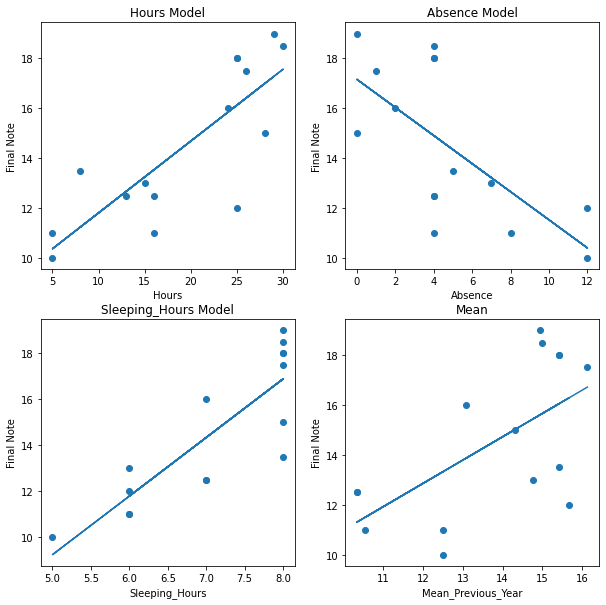

In [58]:
# Plot the regression lines for each model
plt.figure(figsize=(10, 10))

# Hours model
plt.subplot(2, 2, 1)
plt.scatter(df['Hours'], df['Final_Note'])
plt.plot(df['Hours'], model_hours.predict(X[['Hours']]))
plt.xlabel('Hours')
plt.ylabel('Final Note')
plt.title('Hours Model')

# Absence model
plt.subplot(2, 2, 2)
plt.scatter(df['Absence'], df['Final_Note'])
plt.plot(df['Absence'], model_absence.predict(X[['Absence']]))
plt.xlabel('Absence')
plt.ylabel('Final Note')
plt.title('Absence Model')

# Sleeping_Hours model
plt.subplot(2, 2, 3)
plt.scatter(df['Sleeping_Hours'], df['Final_Note'])
plt.plot(df['Sleeping_Hours'], model_sleeping_hours.predict(X[['Sleeping_Hours']]))
plt.xlabel('Sleeping_Hours')
plt.ylabel('Final Note')
plt.title('Sleeping_Hours Model')

# Mean_Previous_Year model
plt.subplot(2, 2, 4)
plt.scatter(df['Mean_Previous_Year'], df['Final_Note'])
plt.plot(df['Mean_Previous_Year'], model_mean_previous_year.predict(X[['Mean_Previous_Year']]))
plt.xlabel('Mean_Previous_Year')
plt.ylabel('Final Note')
plt.title('Mean')

4. Print the MSE of each regression :

In [59]:
import numpy as np

# Print the MSE of each model
print("MSE for Hours model:", np.mean((model_hours.predict(X[['Hours']]) - y)**2))
print("MSE for Absence model:", np.mean((model_absence.predict(X[['Absence']]) - y)**2))
print("MSE for Sleeping_Hours model:", np.mean((model_sleeping_hours.predict(X[['Sleeping_Hours']]) - y)**2))
print("MSE for Mean_Previous_Year model:", np.mean((model_mean_previous_year.predict(X[['Mean_Previous_Year']]) - y)**2))

#un MSE più basso indica che la regressione è una migliore approssimazione dei dati reali.


MSE for Hours model: 3.0879276178556525
MSE for Absence model: 4.9316631750465545
MSE for Sleeping_Hours model: 2.520238095238095
MSE for Mean_Previous_Year model: 5.524746621874841


5. Create a linear regression that estimate the linear score based on all the 4 parameters at the same time.

In [60]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients for the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

from sklearn.metrics import mean_squared_error

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Print the Mean Squared Error
print(f'Mean Squared Error: {mse}')

Coefficients: [ 0.13694794 -0.16160242  1.01902913  0.34676868]
Intercept: 0.6457376772643997
Mean Squared Error: 1.1495586342901618


6. What is its MSE ?

In statistics, the mean squared error (MSE) is a risk function that measures the square of errors. When performing regression, use MSE if you believe your target is normally distributed and you want large errors to be penalized more than small ones.
It measures how well a model fits the data. It is calculated by taking the average of the squared differences between the predicted values and the actual values. The MSE can be used to compare different models or to assess the accuracy of a single model.

The formula for the MSE is as follows:

MSE = 1/n * \sum_{i=1}^n (y_i - \hat{y}_i)^2
where:

y 
i
​
  is the actual value for the $i$th observation
y
^
​
  
i
​
  is the predicted value for the $i$th observation
n is the number of observations
For example, suppose we have a model that predicts the price of a house based on its square footage. We can calculate the MSE for this model by using the following formula:

MSE = 1/n * \sum_{i=1}^n (y_i - \hat{y}_i)^2
where:

y 
i
​
  is the actual price of the $i$th house
y
^
​
  
i
​
  is the predicted price of the $i$th house
n is the number of houses in the dataset
If the model fits the data well, the MSE will be small. If the model does not fit the data well, the MSE will be large.

The MSE can be used to compare different models. For example, suppose we have two models that predict the price of a house based on its square footage. We can compare the MSEs of these two models to determine which model fits the data better.

The MSE can also be used to assess the accuracy of a single model. For example, suppose we have a model that predicts the price of a house based on its square footage. We can calculate the MSE for this model to determine how accurate the model is.

The MSE is a useful measure of model fit. It can be used to compare different models and to assess the accuracy of a single model.

7. Create a neural network with no hidden layers and a linear activation function, and train it :

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define features (X) and target variable (y) for neural network
X_nn = df[['Hours', 'Absence', 'Sleeping_Hours', 'Mean_Previous_Year']]
y_nn = df['Final_Note']

# Split the data into training and testing sets for neural network
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Standardize the input features for neural network
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

# Create a neural network model
nn_model = Sequential()
nn_model.add(Dense(1, input_dim=4, activation='linear'))

# Compile the neural network model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network model
nn_model.fit(X_train_nn, y_train_nn, epochs=2000, batch_size=1, verbose=1)

# Evaluate the neural network model
y_pred_nn = nn_model.predict(X_test_nn)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
r2_nn = r2_score(y_test_nn, y_pred_nn)

# Print results for neural network
print('\nNeural Network:')
print(f'Mean Squared Error: {mse_nn}')
print(f'R-squared: {r2_nn}')

Epoch 1/2000


12/12 [==============================] - 0s 2ms/step - loss: 214.0674
Epoch 2/2000
12/12 [==============================] - 0s 2ms/step - loss: 213.6836
Epoch 3/2000
12/12 [==============================] - 0s 2ms/step - loss: 213.2999
Epoch 4/2000
12/12 [==============================] - 0s 1ms/step - loss: 212.8823
Epoch 5/2000
12/12 [==============================] - 0s 2ms/step - loss: 212.5159
Epoch 6/2000
12/12 [==============================] - 0s 2ms/step - loss: 212.1257
Epoch 7/2000
12/12 [==============================] - 0s 2ms/step - loss: 211.7616
Epoch 8/2000
12/12 [==============================] - 0s 2ms/step - loss: 211.3660
Epoch 9/2000
12/12 [==============================] - 0s 962us/step - loss: 211.0245
Epoch 10/2000
12/12 [==============================] - 0s 2ms/step - loss: 210.6049
Epoch 11/2000
12/12 [==============================] - 0s 773us/step - loss: 210.2440
Epoch 12/2000
12/12 [==============================] - 0s 1ms/step - loss: 209.8250
Epoch 13/2

8. Do you obtain the same MSE ? : 

No we obtain two differente MSE: in the lienar regression is equal to 1.1495 and in the Neural Network is equal to 1.8024. But they are close to each others.

---

# Exercise 2



Data Generation

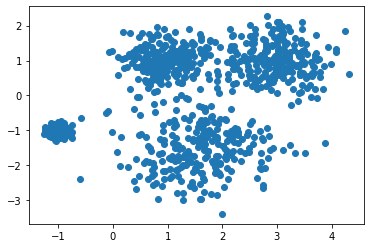

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1.5, -1.5], [3, 1]]
X, labels = make_blobs(n_samples=1000, centers=centers, cluster_std=[0.4, 0.1, 0.75, 0.5], random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

9. Write a clustering algorithm to separate this data into clusters :

In [63]:
from sklearn.cluster import KMeans
# Apply K-Means clustering
num_clusters = 4  # We choose 4 beacuse in the plot, it appears that there are 4 distinct groups
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

10. Visualize the clustering result :

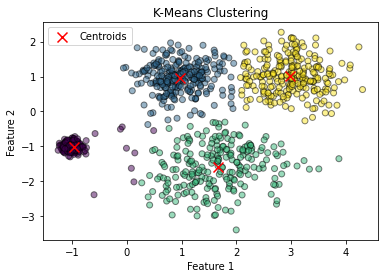

In [64]:
# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

11. Calculate the accuracy of your clustering (comprate with the true labels) :

In [65]:
from sklearn.metrics import accuracy_score

# Assuming 'labels' are the true labels and 'cluster_labels' are the predicted labels from K-Means

# Calculate accuracy
accuracy = accuracy_score(labels, cluster_labels)

# Print the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 0.477


12. Display the points that where not clustered correctly :

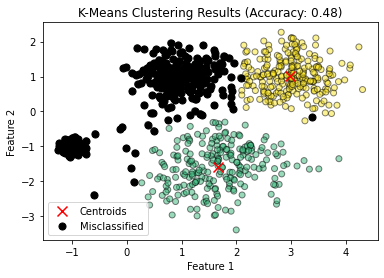

In [66]:
misclassified_points = X[labels != cluster_labels]

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], c='black', marker='o', s=50, label='Misclassified')
plt.title(f'K-Means Clustering Results (Accuracy: {accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

13. Create a neural network to classify this data (use the true labels) :

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create a neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print(f'Neural Network Accuracy: {accuracy_nn}')

Neural Network Accuracy: 0.995


14. Display the neural network model areas, based on the code available here :

https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

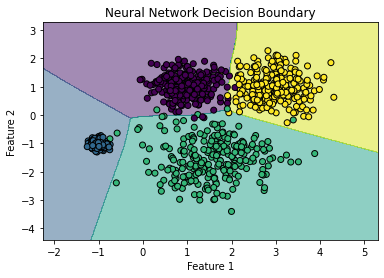

In [68]:
# Create a meshgrid for plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the meshgrid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.5)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors="k", cmap=plt.cm.viridis)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Decision Boundary')

# Show the plot
plt.show()

---
# Exercise 3 : Q-Learning 

Here are the rules of this little game :

- The mouse is at the starting position
- It wants to reach its home in the shortest time
- It can only move step one tile: go left, right, up or down
- There are mines in the maze. If the mouse steps onto a mine, it dies.
- When the mouse gets power ups, it gains speed.

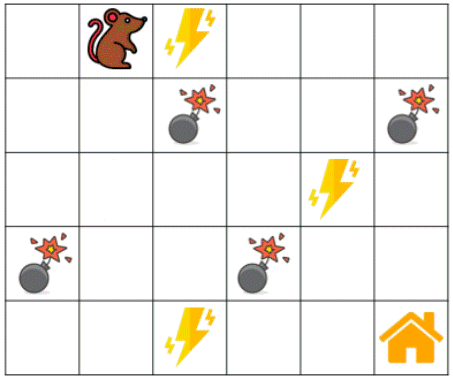

15. What is the number of states in this map ?

Number of positions= M x N [number of rows (M) and columns (N)] = 5 x 6 = 30

Number of power-up states = with power-ups (P) and without power-ups (N) = 2

Number of states = Number of position x Number of power-up states = 30 x 2 = 60

16. What is the action space of this game ?

The action space in this game refers to the set of all possible actions that the mouse can take in a given state. Based on the rules you provided, the actions available to the mouse are:

Move Left: The mouse can move one tile to the left.

Move Right: The mouse can move one tile to the right.

Move Up: The mouse can move one tile upwards.

Move Down: The mouse can move one tile downwards.

These four actions constitute the action space for the mouse in this game. The mouse can choose any of these actions at each step to navigate through the maze. 

Additionally, the mouse might have a fifth action, such as "Stay" or "No Move," if the game allows the mouse to stay in its current position.

17. What is the shape of the Q-Table for this map ?

Considering the number of possible actions (4: move left, move right, move up, move down), the shape of the Q-table would be (60,4), where each row corresponds to a state, and each column corresponds to an action.

So, the correct shape of the Q-table in this case is (60,4)

18. What reward would you give in the different situations ?

1)Mouse reaches home (positive reward):
Give a positive reward when the mouse successfully reaches its home. This reward should be higher than the immediate rewards associated with movements to encourage the mouse to find the optimal path.

2)Mouse steps onto a mine (negative reward):
Give a negative reward when the mouse steps onto a mine. This discourages the mouse from taking actions that lead to death.

3)Mouse collects power-ups (positive reward):
Give a positive reward when the mouse collects power-ups. This encourages the mouse to actively seek and collect power-ups.

4)Mouse dies due to a mine (negative reward):
Give a larger negative reward if the mouse dies due to stepping onto a mine. This emphasizes the importance of avoiding mines.

5)Time penalty (negative reward for each step): Small negative reward for each step to encourage the mouse to find the shortest path and reach its home quickly.

19. Write a function that simulates a game :

In [3]:
import numpy as np

def simulate_game(maze_size, power_ups, rewards, max_steps=100):
    """
    Simulates the game for the given maze size, power-up states, and rewards.

    Parameters:
    - maze_size: Tuple of integers representing the maze size (rows, columns).
    - power_ups: List of strings representing power-up states.
    - rewards: Dictionary containing rewards for different situations.
    - max_steps: Maximum number of steps for simulation.

    Returns:
    - total_reward: Total reward obtained during the simulation.
    - reached_home: Boolean indicating whether the mouse reached home.
    """

    # Unpack maze size
    rows, columns = maze_size

    # Initialize mouse position and power-up state
    mouse_position = (0, 0)
    power_up_state = np.random.choice(power_ups)

    # Initialize total reward
    total_reward = 0

    # Simulate the game for a maximum number of steps
    for step in range(max_steps):
        # Simulate mouse movement (randomly choose one of the four actions)
        action = np.random.choice(["left", "right", "up", "down"])
        new_position = move_mouse(mouse_position, action, maze_size)

        # Check if the new position is valid
        if is_valid_position(new_position, maze_size):
            # Update mouse position
            mouse_position = new_position

            # Check if the mouse reached home
            if mouse_position == (rows - 1, columns - 1):
                total_reward += rewards["reach_home"]
                return total_reward, True

            # Check if the mouse collected a power-up
            if mouse_position == (1, 1):  # Assuming a specific position for power-ups
                power_up_state = np.random.choice(power_ups)
                total_reward += rewards["collect_power_up"]

            # Check if the mouse stepped onto a mine
            if is_mine(mouse_position):
                total_reward += rewards["step_on_mine"]
                return total_reward, False

            # Update reward for a normal step
            total_reward += rewards["step"]

        else:
            # Invalid position, penalize the mouse
            total_reward += rewards["step_invalid"]

    # The simulation reached the maximum number of steps without reaching home
    return total_reward, False


def move_mouse(position, action, maze_size):
    """
    Move the mouse to a new position based on the chosen action.

    Parameters:
    - position: Tuple representing the current position (row, column).
    - action: String representing the chosen action ("left", "right", "up", "down").
    - maze_size: Tuple of integers representing the maze size (rows, columns).

    Returns:
    - new_position: Tuple representing the new position after the movement.
    """

    row, col = position

    if action == "left":
        new_col = max(col - 1, 0)
        return row, new_col
    elif action == "right":
        new_col = min(col + 1, maze_size[1] - 1)
        return row, new_col
    elif action == "up":
        new_row = max(row - 1, 0)
        return new_row, col
    elif action == "down":
        new_row = min(row + 1, maze_size[0] - 1)
        return new_row, col
    else:
        return position


def is_valid_position(position, maze_size):
    """
    Check if a given position is valid within the maze boundaries.

    Parameters:
    - position: Tuple representing the position (row, column).
    - maze_size: Tuple of integers representing the maze size (rows, columns).

    Returns:
    - valid: Boolean indicating whether the position is valid.
    """
    row, col = position
    return 0 <= row < maze_size[0] and 0 <= col < maze_size[1]


def is_mine(position):
    """
    Check if a given position contains a mine.

    Parameters:
    - position: Tuple representing the position (row, column).

    Returns:
    - mine: Boolean indicating whether the position contains a mine.
    """
    # Assuming a specific position for the mine
    return position == (2, 2)


# Define parameters
maze_size = (5, 6)
power_ups = ["with_power_ups", "without_power_ups"]
rewards = {
    "reach_home": 10,
    "step_on_mine": -50,
    "collect_power_up": 5,
    "step": -1,
    "step_invalid": -2,
}

# Simulate the game
total_reward, reached_home = simulate_game(maze_size, power_ups, rewards)

# Display the results
print(f"Total Reward: {total_reward}")
print(f"Reached Home: {reached_home}")

Total Reward: -65
Reached Home: False


20. Calculate the Q-Table and display it (I know, it's a little hard, but still, you have access to ChatGPT!) :

In [17]:
import numpy as np

# Define constants
NUM_STATES = 30
NUM_ACTIONS = 4
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.9
MAX_EPISODES = 500

# Define the maze and other parameters
maze = np.zeros((5, 6))  # Replace with your maze configuration
start_position = (0, 0)
home_position = (4, 5)
mine_positions = [(1, 1), (2, 2)]  # Add more positions as needed
power_up_positions = [(3, 3)]  # Add more positions as needed

# Initialize Q-table
q_table = np.zeros((NUM_STATES, NUM_ACTIONS))

# Map positions to states
state_mapping = {(i, j): i * 6 + j for i in range(5) for j in range(6)}

# Define the reward function
def get_reward(current_position):
    if current_position == home_position:
        return 100  # Reach home
    elif current_position in mine_positions:
        return -100  # Hit a mine
    elif current_position in power_up_positions:
        return 5  # Collect a power-up
    else:
        return -1  # Move

# Define the epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < EPSILON:
        return np.random.randint(NUM_ACTIONS)
    else:
        return np.argmax(q_table[state, :])

# Define the game simulation function
def simulate_game():
    current_position = start_position
    current_state = state_mapping[current_position]

    for episode in range(MAX_EPISODES):
        while current_position != home_position and current_position not in mine_positions:
            action = choose_action(current_state)
            new_position = update_position(current_position, action)
            new_state = state_mapping[new_position]

            reward = get_reward(new_position)

            # Q-learning update
            q_table[current_state, action] += LEARNING_RATE * (
                reward + DISCOUNT_FACTOR * np.max(q_table[new_state, :]) - q_table[current_state, action]
            )

            current_position = new_position
            current_state = new_state

    return q_table

# Function to update the position based on the action
def update_position(position, action):
    i, j = position
    if action == 0:  # Move up
        return max(0, i - 1), j
    elif action == 1:  # Move down
        return min(4, i + 1), j
    elif action == 2:  # Move left
        return i, max(0, j - 1)
    elif action == 3:  # Move right
        return i, min(5, j + 1)

# Run Q-learning simulation
q_table = simulate_game()

# Display the Q-table
print("Q-Table:")
print(q_table)

Q-Table:
[[  0.    0.    0.   -0.1]
 [ -0.1 -10.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]]
